In [4]:
import pandas as pd
df= pd.read_csv("dopamine_pIC50.csv")
df

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL303519,c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1,active,342.45,3.37,0.00,4.00,7.70
1,1,CHEMBL292943,COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1,active,360.46,3.47,0.00,5.00,7.24
2,2,CHEMBL61682,Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1,active,365.43,4.35,0.00,3.00,8.52
3,3,CHEMBL64487,COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1,active,360.46,3.47,0.00,5.00,7.80
4,4,CHEMBL64597,c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1,active,336.46,3.53,0.00,5.00,8.52
...,...,...,...,...,...,...,...,...,...
271,271,CHEMBL4453069,O=C(CN1CCN(c2ccccn2)CC1)Nc1cncnc1,inactive,298.35,0.63,1.00,6.00,4.00
272,272,CHEMBL4456754,O=C(CN1CCN(c2ccc(Cl)cn2)CC1)Nc1cncnc1,inactive,332.80,1.29,1.00,6.00,4.00
273,273,CHEMBL20734,CNc1cc(OC)c(C(=O)NC2CCN(Cc3ccccc3)C2C)cc1Cl,active,387.91,3.78,2.00,4.00,7.01
274,274,CHEMBL4476784,COc1ccc(OCCN2CCN(C(=O)c3cc4ccccc4[nH]3)CC2)cc1,inactive,379.46,3.01,1.00,4.00,4.30


In [5]:

selection = ['MW','NumHDonors', 'NumHAcceptors']
X = df[selection]
X

,MW,NumHDonors,NumHAcceptors
0,342.45,0.00,4.00
1,360.46,0.00,5.00
2,365.43,0.00,3.00
3,360.46,0.00,5.00
4,336.46,0.00,5.00
...,...,...,...
271,298.35,1.00,6.00
272,332.80,1.00,6.00
273,387.91,2.00,4.00
274,379.46,1.00,4.00


In [8]:

Y = df['pIC50']
Y

0      7.698970
1      7.244125
2      8.522879
3      7.795880
4      8.522879
         ...   
271    4.000000
272    4.000000
273    7.007889
274    4.301030
275    8.000000
Name: pIC50, Length: 276, dtype: float64

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [10]:

X.shape

(276, 3)

In [12]:
Y.shape

(276,)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.06518517875033991

In [16]:

Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

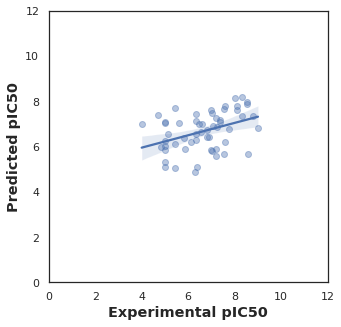

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [19]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [7]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [8]:
! cat molecule.smi | head -5

c1cnc(N2CCN(Cc3cccc4c3Cc3ccccc3-4)CC2)nc1	CHEMBL303519
COc1ccc(-c2cccc(CN3CCN(c4ncccn4)CC3)c2)cc1	CHEMBL292943
Fc1ccc(-c2cncc(CN3CCN(c4ccccc4F)CC3)c2)cc1	CHEMBL61682
COc1ccccc1-c1cccc(CN2CCN(c3ncccn3)CC2)c1	CHEMBL64487
c1cnc(N2CCN(Cc3cccc(-c4ccsc4)c3)CC2)nc1	CHEMBL64597


In [9]:
! cat molecule.smi | wc -l

276


In [10]:

! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [11]:

! bash padel.sh

Processing CHEMBL303519 in molecule.smi (1/276). 
Processing CHEMBL292943 in molecule.smi (2/276). 
Processing CHEMBL61682 in molecule.smi (3/276). Average speed: 3.13 s/mol.
Processing CHEMBL64487 in molecule.smi (4/276). Average speed: 1.87 s/mol.
Processing CHEMBL64597 in molecule.smi (5/276). Average speed: 1.60 s/mol.
Processing CHEMBL291824 in molecule.smi (6/276). Average speed: 1.35 s/mol.
Processing CHEMBL61657 in molecule.smi (8/276). Average speed: 1.14 s/mol.
Processing CHEMBL59942 in molecule.smi (7/276). Average speed: 1.17 s/mol.
Processing CHEMBL302183 in molecule.smi (9/276). Average speed: 0.99 s/mol.
Processing CHEMBL64622 in molecule.smi (10/276). Average speed: 0.96 s/mol.
Processing CHEMBL304692 in molecule.smi (11/276). Average speed: 0.86 s/mol.
Processing CHEMBL555670 in molecule.smi (12/276). Average speed: 0.86 s/mol.
Processing CHEMBL291380 in molecule.smi (13/276). Average speed: 0.80 s/mol.
Processing CHEMBL64671 in molecule.smi (14/276). Average speed: 0.

In [36]:
df_X = pd.read_csv('descriptors_output.csv')

In [37]:
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL292943,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL303519,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL61682,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL64487,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL64597,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,CHEMBL4453069,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
272,CHEMBL4456754,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
273,CHEMBL20734,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
274,CHEMBL4476784,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df_X = df_X.drop(columns=['Name'])
df_X
df_X.shape

(276, 881)

In [42]:
df_Y = df['pIC50']
df_Y

0      7.698970
1      7.244125
2      8.522879
3      7.795880
4      8.522879
         ...   
271    4.000000
272    4.000000
273    7.007889
274    4.301030
275    8.000000
Name: pIC50, Length: 276, dtype: float64

In [40]:
#Removing low variance features

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
df_X = selection.fit_transform(df_X)

In [41]:
df_X.shape

(276, 136)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2)

In [44]:

X_train.shape, Y_train.shape

((220, 136), (220,))

In [45]:
X_test.shape, Y_test.shape

((56, 136), (56,))

In [46]:

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.38045742629428936

In [47]:

Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

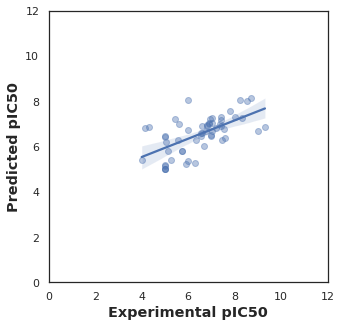

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Assignment: Apply lazypredict on dataset dopamine_pIC50.csv